In [2]:
#Stock Market Prediction And Forecasting Using Stacked LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv('Stockprice.csv')
df.head()
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,1253,AAPL,2020-05-18 00:00:00+00:00,314.96,316.50,310.3241,313.17,33843125,314.96,316.50,310.3241,313.17,33843125,0.0,1.0
1254,1254,AAPL,2020-05-19 00:00:00+00:00,313.14,318.52,313.0100,315.03,25432385,313.14,318.52,313.0100,315.03,25432385,0.0,1.0
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.2000,316.68,27876215,319.23,319.52,316.2000,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.8700,318.66,25672211,316.85,320.89,315.8700,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.3500,315.77,20450754,318.89,319.23,315.3500,315.77,20450754,0.0,1.0


In [2]:
df1=df.reset_index()['high']
df1

0       132.260
1       131.950
2       131.450
3       131.390
4       130.655
         ...   
1253    316.500
1254    318.520
1255    319.520
1256    320.890
1257    319.230
Name: high, Length: 1258, dtype: float64

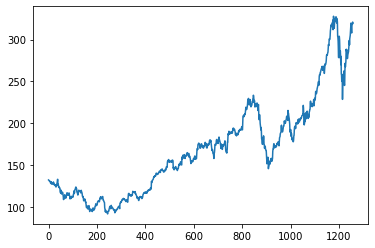

In [3]:
plt.plot(df1)

In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.17186045],
       [0.17054789],
       [0.16843086],
       ...,
       [0.96473029],
       [0.97053095],
       [0.96350241]])

In [5]:
#splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [6]:
training_size,test_size

(817, 441)

In [10]:
#convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [11]:
#reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [13]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [14]:
#reshape input for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [3]:
#Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 220ms/step - loss: 0.0159 - val_loss: 0.0598
Epoch 2/100
12/12 [==============================] - 1s 112ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 3/100
12/12 [==============================] - 1s 107ms/step - loss: 9.0960e-04 - val_loss: 0.0121
Epoch 4/100
12/12 [==============================] - 1s 103ms/step - loss: 8.4134e-04 - val_loss: 0.0043
Epoch 5/100
12/12 [==============================] - 1s 105ms/step - loss: 6.4912e-04 - val_loss: 0.0035
Epoch 6/100
12/12 [==============================] - 1s 104ms/step - loss: 6.0984e-04 - val_loss: 0.0035
Epoch 7/100
12/12 [==============================] - 1s 108ms/step - loss: 6.1357e-04 - val_loss: 0.0034
Epoch 8/100
12/12 [==============================] - 1s 114ms/step - loss: 5.5906e-04 - val_loss: 0.0033
Epoch 9/100
12/12 [==============================] - 1s 116ms/step - loss: 5.7926e-04 - val_loss: 0.0039
Epoch 10/100
12/12 [==============================] - 1s 111ms/

In [19]:
tf.__version__

'2.9.1'

In [20]:
#Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


#Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11/11 [==============================] - 0s 19ms/step


142.58510111432892

In [21]:
#Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

240.19410544116298

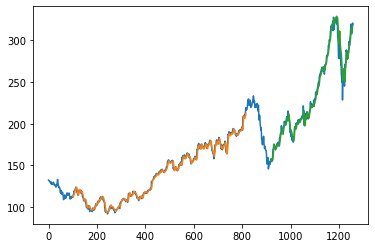

In [23]:
#Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict


# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict


# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()



temp_input

[0.855322211872301,
 0.8846218985519521,
 0.8845372173765771,
 0.8819121009399611,
 0.8858921161825726,
 0.9008802608180202,
 0.9262426962486241,
 0.935726987890592,
 0.954356846473029,
 0.956473875857397,
 0.947709374206114,
 0.948556185959861,
 0.9614277246168177,
 0.9626132610720637,
 0.9667202980777374,
 0.9648996528071809,
 0.9808620543653146,
 0.9319163349987298,
 0.9599881446354475,
 1.0000000000000002,
 0.9840799390295536,
 0.9781099161656364,
 0.9391989160809553,
 0.9652383775086799,
 0.9869167584046066,
 0.9888644254382253,
 0.9811584384791261,
 0.9733254297569651,
 0.9832754678634938,
 0.9973325429756967,
 0.993098484206961,
 0.9920823101024643,
 0.9657041239732409,
 0.9861122872385468,
 0.9864510119400456,
 0.9686679651113557,
 0.8997798289440258,
 0.8927936319756118,
 0.8731052587009909,
 0.8228046405284106,
 0.7906681344737065,
 0.88817850791769,
 0.8990176983656533,
 0.8964772631044118,
 0.8801761368447796,
 0.8432128037937168,
 0.789313235667711,
 0.8246676263866544,
 0

In [27]:
#prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9695327]
101
1 day input [0.8846219  0.88453722 0.8819121  0.88589212 0.90088026 0.9262427
 0.93572699 0.95435685 0.95647388 0.94770937 0.94855619 0.96142772
 0.96261326 0.9667203  0.96489965 0.98086205 0.93191633 0.95998814
 1.         0.98407994 0.97810992 0.93919892 0.96523838 0.98691676
 0.98886443 0.98115844 0.97332543 0.98327547 0.99733254 0.99309848
 0.99208231 0.96570412 0.98611229 0.98645101 0.96866797 0.89977983
 0.89279363 0.87310526 0.82280464 0.79066813 0.88817851 0.8990177
 0.89647726 0.88017614 0.8432128  0.78931324 0.82466763 0.80256584
 0.7550597  0.79706156 0.70882378 0.70259971 0.67037852 0.68240325
 0.67812685 0.57934499 0.66059785 0.70530951 0.70713015 0.69523245
 0.69375053 0.72326192 0.66495893 0.64984334 0.65217207 0.72588704
 0.7622576  0.74392413 0.75535608 0.77072572 0.83233127 0.82420188
 0.83210898 0.82680583 0.80451351 0.78575663 0.78850876 0.80480989
 0.8101448  0.81662291 0.82208485 0.83834364 0.85892116 0.8778474
 0.85536455 0.88631552 0.89579981 0.9

10 day output [[1.0043164]]
11 day input [0.94855619 0.96142772 0.96261326 0.9667203  0.96489965 0.98086205
 0.93191633 0.95998814 1.         0.98407994 0.97810992 0.93919892
 0.96523838 0.98691676 0.98886443 0.98115844 0.97332543 0.98327547
 0.99733254 0.99309848 0.99208231 0.96570412 0.98611229 0.98645101
 0.96866797 0.89977983 0.89279363 0.87310526 0.82280464 0.79066813
 0.88817851 0.8990177  0.89647726 0.88017614 0.8432128  0.78931324
 0.82466763 0.80256584 0.7550597  0.79706156 0.70882378 0.70259971
 0.67037852 0.68240325 0.67812685 0.57934499 0.66059785 0.70530951
 0.70713015 0.69523245 0.69375053 0.72326192 0.66495893 0.64984334
 0.65217207 0.72588704 0.7622576  0.74392413 0.75535608 0.77072572
 0.83233127 0.82420188 0.83210898 0.82680583 0.80451351 0.78575663
 0.78850876 0.80480989 0.8101448  0.81662291 0.82208485 0.83834364
 0.85892116 0.8778474  0.85536455 0.88631552 0.89579981 0.90397155
 0.92590397 0.95427217 0.96544161 0.9496147  0.9235329  0.91553053
 0.95194343 0.9604962

20 day output [[1.0514345]]
21 day input [0.97810992 0.93919892 0.96523838 0.98691676 0.98886443 0.98115844
 0.97332543 0.98327547 0.99733254 0.99309848 0.99208231 0.96570412
 0.98611229 0.98645101 0.96866797 0.89977983 0.89279363 0.87310526
 0.82280464 0.79066813 0.88817851 0.8990177  0.89647726 0.88017614
 0.8432128  0.78931324 0.82466763 0.80256584 0.7550597  0.79706156
 0.70882378 0.70259971 0.67037852 0.68240325 0.67812685 0.57934499
 0.66059785 0.70530951 0.70713015 0.69523245 0.69375053 0.72326192
 0.66495893 0.64984334 0.65217207 0.72588704 0.7622576  0.74392413
 0.75535608 0.77072572 0.83233127 0.82420188 0.83210898 0.82680583
 0.80451351 0.78575663 0.78850876 0.80480989 0.8101448  0.81662291
 0.82208485 0.83834364 0.85892116 0.8778474  0.85536455 0.88631552
 0.89579981 0.90397155 0.92590397 0.95427217 0.96544161 0.9496147
 0.9235329  0.91553053 0.95194343 0.96049623 0.96473029 0.97053095
 0.96350241 0.96953273 0.97097981 0.97307289 0.97581792 0.97909284
 0.98279369 0.98681712

In [31]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

scaler.inverse_transform(lst_output)

array([[320.65423975],
       [320.99601147],
       [321.49035433],
       [322.13867606],
       [322.9121461 ],
       [323.78621341],
       [324.73646776],
       [325.73827363],
       [326.77044451],
       [327.81712921],
       [328.86945896],
       [329.92405518],
       [330.98233968],
       [332.04808522],
       [333.12607812],
       [334.22065422],
       [335.33491056],
       [336.47033936],
       [337.62694059],
       [338.80341916],
       [339.9978042 ],
       [341.2078715 ],
       [342.43139682],
       [343.66657824],
       [344.91195172],
       [346.16667261],
       [347.43029044],
       [348.70249549],
       [349.98354116],
       [351.27328669]])

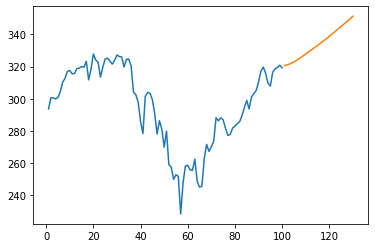

In [32]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

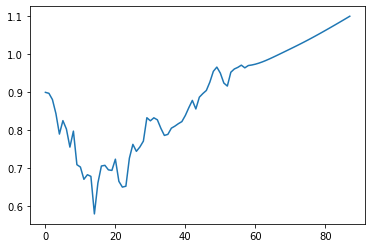

In [33]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

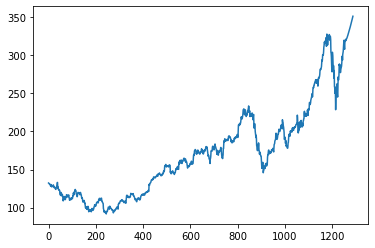

In [34]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)